<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?




In [0]:
#Define inputs

# # True positive rate = 100%
# true_pos_rate = 1
# # False positive rate = 8%
# false_pos_rate = .08
# # Probablity of drunk driving = 1/1000
# prob_of_drunk_driving = 1 / 1000
# # Probablity of non drunk driving = 1 - prob of drunk driving
# prob_of_non_drunk_driving = 1 - prob_of_drunk_driving

# # Define numerator and denominator
# numerator =  true_pos_rate * prob_of_drunk_driving
# denominator = (true_pos_rate * prob_of_drunk_driving) +(false_pos_rate * prob_of_non_drunk_driving)

# # Posterior probability 

# posterior = numerator / denominator

# posterior


def posterior_probability (prob_of_drunk, true_positive_rate, false_positive_rate):
  numerator = (true_positive_rate * prob_of_drunk)
  denominator = (true_positive_rate * prob_of_drunk) + (false_positive_rate * (1 - prob_of_drunk))

  posterior = numerator / denominator
  return posterior


In [84]:
#prob of positive test after one breathalyzer

posterior_probability(1 / 1000, 1, .08)

0.012357884330202669

In [85]:
#prob of positive test after two breathalyzer

posterior_probability(posterior, 1, .08)

0.13525210993291495

In [86]:
#prob of positive test after three breathalyzer

posterior_probability(0.13525210993291495, 1, .08)

0.6615996951348605

In [87]:
#prob of positive test after four breathalyzer

posterior_probability(0.6615996951348605, 1, .08)

0.9606895076105054

In [88]:
posterior_probability(1 / 1000, 1, .08)

0.012357884330202669

In [0]:
### Single function to run until get a probablity greater than .95

def posterior_probability_final (prob_of_drunk, true_positive_rate, false_positive_rate, probability_rate_wanted):
  n = 1
  posterior = prob_of_drunk ** n
  posterior_list = []

  while posterior < probability_rate_wanted:
    probability_of_drunk = posterior
    numerator = (true_positive_rate * probability_of_drunk)
    denominator = (true_positive_rate * probability_of_drunk) + (false_positive_rate * (1 - probability_of_drunk))

    posterior = numerator / denominator
    
    posterior_list.append(posterior)
    
    print('Test number ' + str(n) + ' is ' + str(posterior))
    n += 1

  posterior_list

In [205]:


posterior_probability_final(1 / 1000, 1, .08, .95)




Test number 1 is 0.012357884330202669
Test number 2 is 0.13525210993291495
Test number 3 is 0.6615996951348605
Test number 4 is 0.9606895076105054


### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

In [0]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
column_names = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing',
                         'adopotion-of-the-budget-resolution', 'physician-fee-freeze',
                         'el-salvaldor-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 
                         'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 
                         'synfuels-corporation-cutback', 'education-spending',
                         'superfund-right-to-sue', 'crime', 'duty-free-exports',
                         'export-administration-act-south-africa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=column_names)

df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adopotion-of-the-budget-resolution,physician-fee-freeze,el-salvaldor-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [98]:
df = df.replace({'y': 1, 'n': 0, "?": np.NaN})
print(df.shape)
df.head()

(435, 17)


,Class Name,handicapped-infants,water-project-cost-sharing,adopotion-of-the-budget-resolution,physician-fee-freeze,el-salvaldor-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [100]:
rep = df[df['Class Name']=='republican']
print(rep.shape)

dem = df[df['Class Name']=='democrat']
print(dem.shape)


(168, 17)
(267, 17)


In [168]:
def confidence_interval(data, confidence=.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean-interval, mean, mean+interval)

confidence_interval(dem['handicapped-infants'].dropna())


(0.5445926997425515, 0.6046511627906976, 0.6647096258388437)

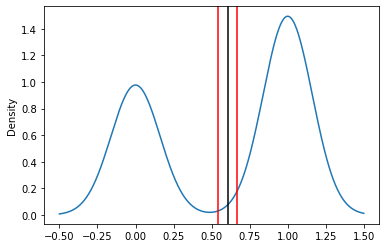

In [171]:
CI, _, _, = stats.bayes_mvs(dem['handicapped-infants'].dropna(), alpha=.95)


dem['handicapped-infants'].plot.density()
plt.axvline(x=CI[1][0], color='red')
plt.axvline(x=CI[0], color='black')
plt.axvline(x=CI[1][1], color='red')
plt.show()

In [0]:
?stats.bayes_mvs

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).

bayseian inference is using probablilities for prior observied data. Frequentists use the liklihood of the observed **and** the unobserved data. Bayseian relies on a degree of confidence in the chosen prior. frequentist does not require or depend on a prior. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt